<a href="https://colab.research.google.com/github/Forrestjohnson2000/6162-Seabreeze/blob/main/Sea_Breeze_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Breeze Logistic Regression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Reading in our data and dropping unnecessary columns
df = pd.read_csv("https://raw.githubusercontent.com/Forrestjohnson2000/6162-Seabreeze/main/Data/prepped_data.csv")
df = df.drop(["Unnamed: 0", 'date', 'hour'], axis=1)
df

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
0,67.500000,8.0500,250.0,4.0,1017.408303,21.836225,4.547025,0.0
1,22.500000,2.0125,80.0,5.0,1017.408303,21.836225,6.092861,0.0
2,25.000000,8.3375,50.0,6.0,1017.408303,21.836225,7.273592,0.0
3,0.000000,0.0000,350.0,5.0,1017.408303,21.836225,5.821537,0.0
4,25.000000,9.4875,50.0,8.0,1017.408303,21.836225,6.718124,0.0
...,...,...,...,...,...,...,...,...
3166,32.500000,6.3250,38.0,6.6,1032.100000,13.900000,4.738069,0.0
3167,250.000000,11.7875,269.0,0.8,1025.500000,13.900000,3.090149,0.0
3168,48.792615,6.3250,270.0,1.8,1021.500000,14.400000,5.244294,0.0
3169,222.500000,12.3625,225.0,8.3,1012.900000,14.300000,3.314484,0.0


In [ ]:
#Separating out our dependent and independent variables
y = df['AttackCat']
X = df.drop(["AttackCat"], axis=1)


In [ ]:
#Scaling numeric inputs
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.8)


In [ ]:
#Creating our Logistic Rgression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
clf = LogisticRegression(random_state=42).fit(X_train,y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
clf.coef_

array([[-0.1722511 ,  0.12925945,  0.32068639,  0.07523396,  0.20314167,
         0.10691078, -1.13606021]])

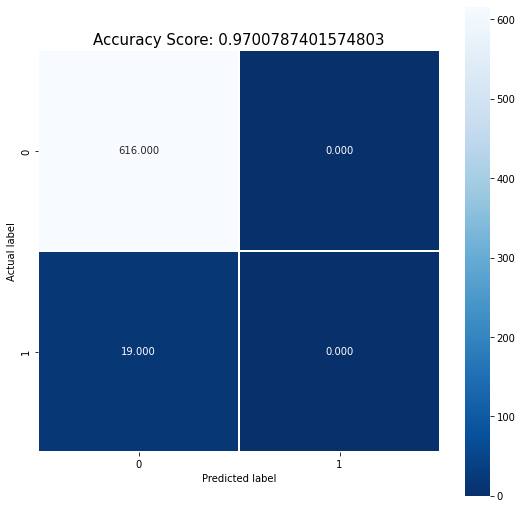

In [ ]:
#Initial Logistic Regression Model
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

We can see from the above that model is quite accurate at .97 but it is only accurate at predicting when there is no shark attack, it never correctly predicts a shark attack, therefore we need to look into undersampling our data

# Undersampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
#Train the model using the training sets
clf_under = clf.fit(X_train_under, y_train_under)

#Predict the response for test dataset
y_pred_under = clf_under.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_under))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, y_pred_under))

Accuracy: 0.7181102362204724
ROC AUC score for undersampled data:  0.7781954887218046


NameError: ignored

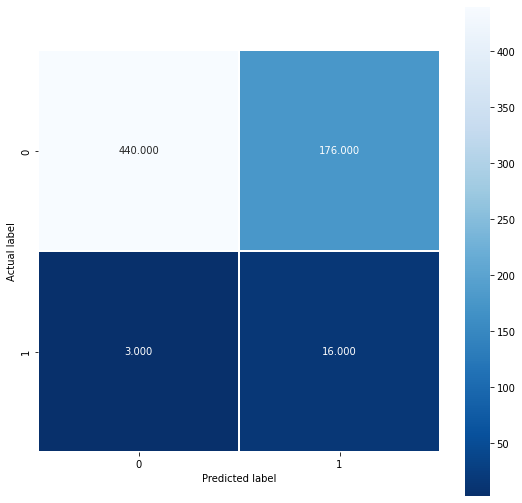

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_under)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_under)
plt.title(all_sample_title, size = 15);

This method, while less accurate at .7511, is much better at predicting when shark attacks occur, predicting 12 of the 19 total or roughly 63% in that regard.

Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# define oversampling strategy
SMOTE_model = SMOTE()

In [ ]:
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE_model.fit_resample(X_train, y_train)

In [ ]:
clf_SMOTE = clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE = clf_SMOTE.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SMOTE))
print("ROC AUC score for oversampled data: ", roc_auc_score(y_test, y_pred_SMOTE))

Accuracy: 0.694488188976378
ROC AUC score for oversampled data:  0.715011961722488


In [ ]:
score_over = clf_SMOTE.score(X_test, y_test)


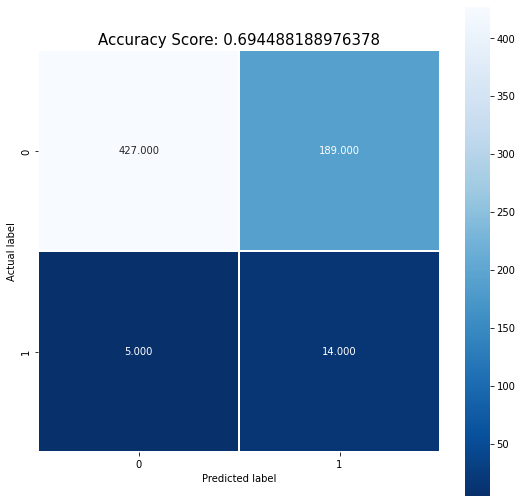

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_SMOTE)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_over)
plt.title(all_sample_title, size = 15);

This method using oversampling was slightly worse than undersampling with a lower overall accuracy of .7212 and correctly predicting the same amount of shark attacks.

# Combination of Under and Oversampling using Pipeline

In [37]:
from imblearn.pipeline import Pipeline

In [38]:
model = clf
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [39]:
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)

In [40]:
from numpy import mean

In [41]:
# evaluate pipeline
accuracy_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
accuracy_score = mean(accuracy_scores)
roc_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
roc_score = mean(roc_scores)
print('Accuracy score for the combined method: %.3f' % accuracy_score)
print('ROC AUC score for the combined sampling method: %.3f' % roc_score)

Accuracy score for the combined method: 0.810
ROC AUC score for the combined sampling method: 0.786


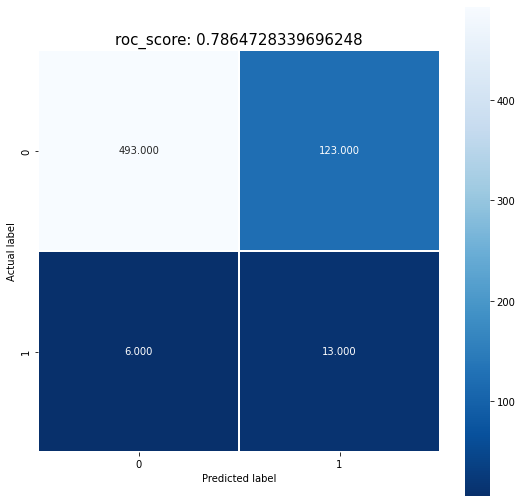

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred_pipeline)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'roc_score: {0}'.format(roc_score)
plt.title(all_sample_title, size = 15);

This model had our highest accuracy of the ones attempting to augment the number of samples to create a more balanced dataset. This model produced a .78 accuracy and correctly predicting 13 of the 19 total shark attacks for about 68% accuracy in that regard.

# Coeffficients

In [45]:
print(pipeline)

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.5)),
                ('u', RandomUnderSampler(sampling_strategy=0.6)),
                ('model', LogisticRegression(random_state=42))])


In [46]:
coefs = pipeline.named_steps["model"].coef_.flatten()

In [47]:
# Zip coefficients and names together and make a DataFrame
feature_names = ['drct', 'sped', 'WDIR', 'WSPD', 'PRES', 'WTMP','SBI']
zipped = zip(feature_names, coefs)
df_coef = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df_coef["abs_value"] = df_coef["value"].apply(lambda x: abs(x))
df_coef["colors"] = df_coef["value"].apply(lambda x: "green" if x > 0 else "red")
df_coef = df_coef.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

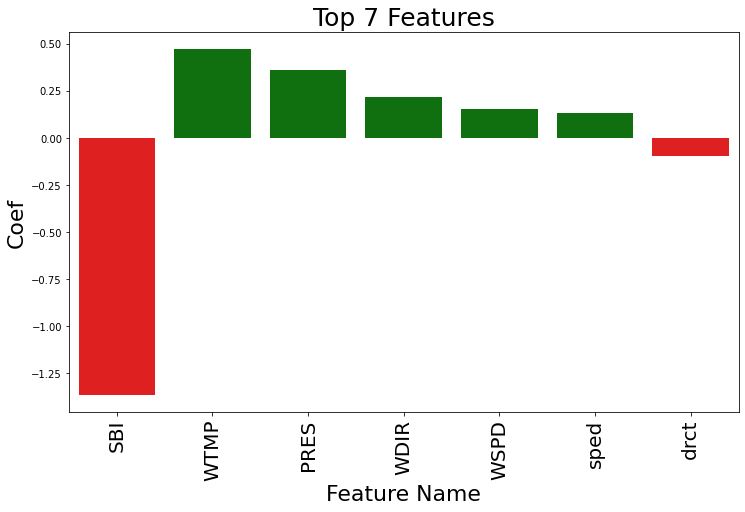

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_coef.head(20),
           palette=df_coef.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 7 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

This graph shows that SBI is the top feature in predicting a shark attack, with a highly negative coefficient which would make sense as lower SBI leads to a higher chance of sea breeze. This seems to prove that our Sea Breeze Indicator that we created is indeed a strong predictor of shark attacks as we hypothesized.

# Permutation Importance

In [43]:
import numpy as np
from sklearn.inspection import permutation_importance
features = np.array(feature_names)
perm_importance = permutation_importance(pipeline.named_steps["model"], X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

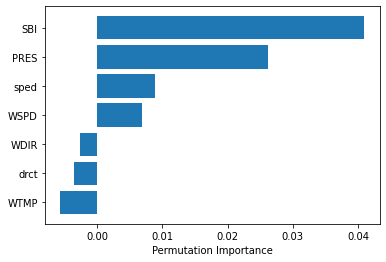

In [44]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The permutation importance indicates the decrease in a model score when a feature value is randomly shuffled, here we see that for both pressure and SBI this is quite high which would again lead us to believe that our Sea Breeze Indicator is an important predictor of shark attacks. 